# **REGRESSÃO DE POISSON**

Utilizada para dados de contagem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import scipy.stats as stats
import seaborn as sns
import warnings

# Suprimir os warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

Carregando a base de dados

In [2]:
reclamacoes = pd.read_excel('reclamacoes.xlsx')

Reclamações feitas sobre o serviço de internet

In [3]:
reclamacoes.head(15)

,dia,velocidade,conexao,instabilidade
0,1,43,15,34
1,2,45,21,29
2,3,46,17,26
3,4,49,14,23
4,5,52,20,25
5,6,55,18,22
6,7,63,17,19
7,8,59,21,20
8,9,58,23,14
9,10,60,16,12


In [4]:
reclamacoes.shape

(15, 4)

## Análise Descritiva

In [5]:
reclamacoes.describe()

,dia,velocidade,conexao,instabilidade
count,15.000000,15.000000,15.000000,15.000000
mean,8.000000,57.666667,18.200000,18.400000
std,4.472136,9.224708,2.677952,8.042743
min,1.000000,43.000000,14.000000,8.000000
25%,4.500000,50.500000,16.500000,11.500000
50%,8.000000,59.000000,18.000000,19.000000
75%,11.500000,63.000000,20.500000,24.000000
max,15.000000,73.000000,23.000000,34.000000


C:\Users\p0131335\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


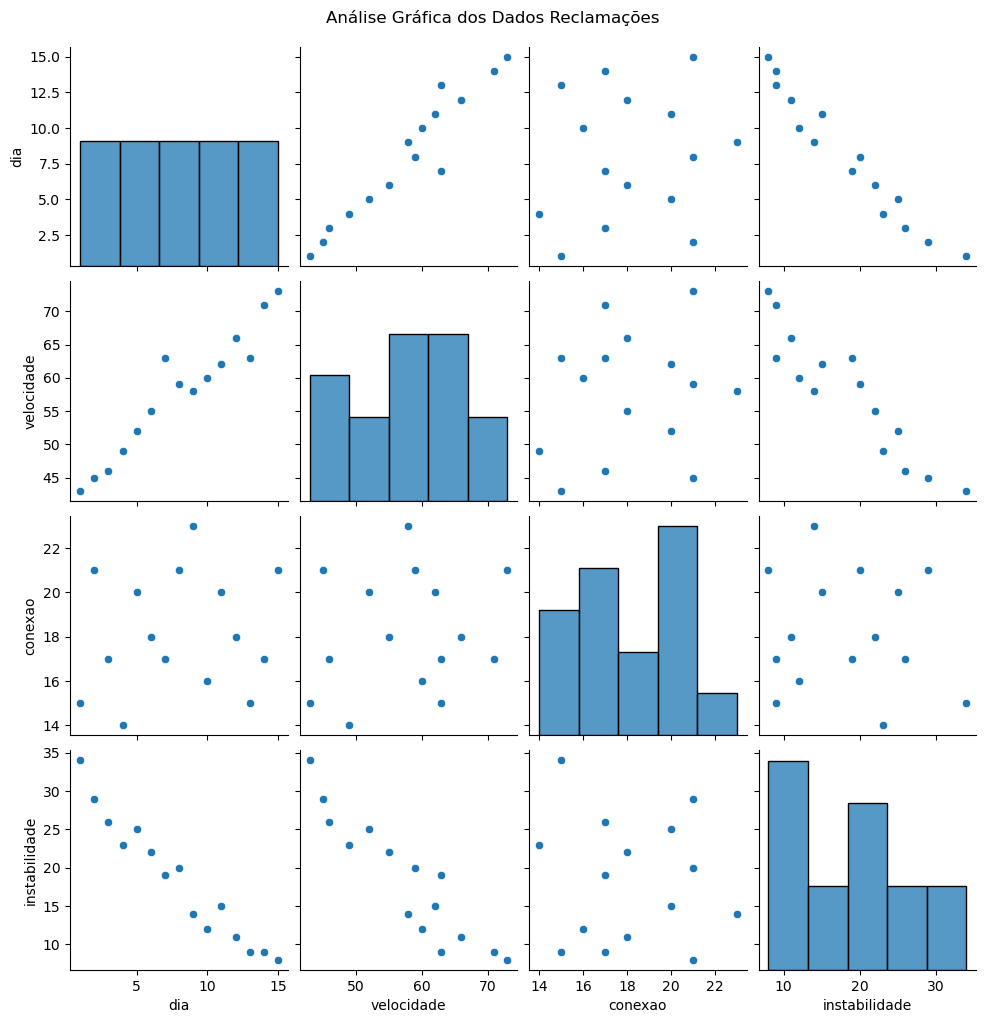

In [6]:
# Análise gráfica - Pairplot
sns.pairplot(reclamacoes)
plt.suptitle("Análise Gráfica dos Dados Reclamações", y=1.02)
plt.show()

In [7]:
correlation_matrix = reclamacoes.corr()
correlation_matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
#plt.title("Matriz de Correlação")
#plt.show()

,dia,velocidade,conexao,instabilidade
dia,1.000000,0.959211,0.155070,-0.973081
velocidade,0.959211,1.000000,0.179270,-0.925206
conexao,0.155070,0.179270,1.000000,-0.110104
instabilidade,-0.973081,-0.925206,-0.110104,1.000000


**Objetivo: Analisar reclamações em uma nova empresa de internet**

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

## **Modelo Reclamação por velocidade**

In [9]:
modelo1 = smf.poisson("velocidade ~ dia", data=reclamacoes).fit()

Optimization terminated successfully.
         Current function value: 3.003118
         Iterations 4


In [10]:
print(modelo1.summary())

                          Poisson Regression Results                          
Dep. Variable:             velocidade   No. Observations:                   15
Model:                        Poisson   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                  0.1745
Time:                        14:24:36   Log-Likelihood:                -45.047
converged:                       True   LL-Null:                       -54.572
Covariance Type:            nonrobust   LLR p-value:                 1.273e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7679      0.076     49.297      0.000       3.618       3.918
dia            0.0345      0.008      4.350      0.000       0.019       0.050


**Equação: reclamação_veloc = e^(3.7679+0.0345.dia)**

In [11]:
 modelo1.fittedvalues

0     3.802372
1     3.836836
2     3.871300
3     3.905764
4     3.940227
5     3.974691
6     4.009155
7     4.043618
8     4.078082
9     4.112546
10    4.147009
11    4.181473
12    4.215937
13    4.250401
14    4.284864
dtype: float64

**Análise do modelo:**


*   Verificar a significancia dos coeficintes (Teste de Wald):
    * Estatisticamente significativo: p <= 0,05
    * Estatisticamente não é significativo: p > 0,05

*   Análise de Resíduos
    
*   Análise da Ausência de outliers e pontos de alavancagem


**Teste de Pearson:**

**Hipótese Nula (H0):** Não há relação entre os valores observados e os valores preditos pelo modelo.

**Hipótese Alternativa (H1):** Há uma relação entre os valores observados e os valores preditos pelo modelo.

Regra de Aceitação: Se o valor-p > 0.05, então não rejeitamos a hipótese nula.

In [12]:
residuos_pearson = modelo1.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo1.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)

print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)


Teste de Pearson para os Resíduos:
Estatística de teste: 1.8863946995308387
Graus de liberdade: 13.0
Valor p: 0.9998376195420132


#### Teste de Razão de Verossimilhança (Likelihood Ratio test)

Comparar a adequação de dois modelos, um modelo nulo e um modelo alternativo.


H0: O modelo mais simples (modelo nulo) é suficientemente bom para descrever os dados. Em outras palavras, não há diferença significativa entre o modelo nulo e o modelo alternativo em termos de ajuste aos dados.

H1 : O modelo mais complexo (modelo alternativo) fornece um ajuste significativamente melhor aos dados em comparação com o modelo nulo. Em outras palavras, há evidência estatística de que o modelo alternativo é preferível ao modelo nulo para explicar os dados.

**p-valor < 0.05** 
Indica que o modelo alternativo é estatisticamente melhor em ajustar os dados do que o modelo nulo


In [13]:
# Calcular o valor p para o teste de Razão de Verossimilhança (LR)
lrt_test_statistic = modelo1.llr  # Obtém o valor do teste de Likelihood Ratio
lrt_df = modelo1.df_model  # Obtém os graus de liberdade do modelo
lrt_p_value = 1 - stats.chi2.cdf(lrt_test_statistic, lrt_df)

print("\nTeste de Razão de Verossimilhança (LR) para os Resíduos:")
print(f"Estatística de teste: {lrt_test_statistic}")
print(f"Graus de liberdade: {lrt_df}")
print(f"Valor p: {lrt_p_value}")


Teste de Razão de Verossimilhança (LR) para os Resíduos:
Estatística de teste: 19.05034984126783
Graus de liberdade: 1.0
Valor p: 1.2731443158386924e-05


**Análise de residuos**

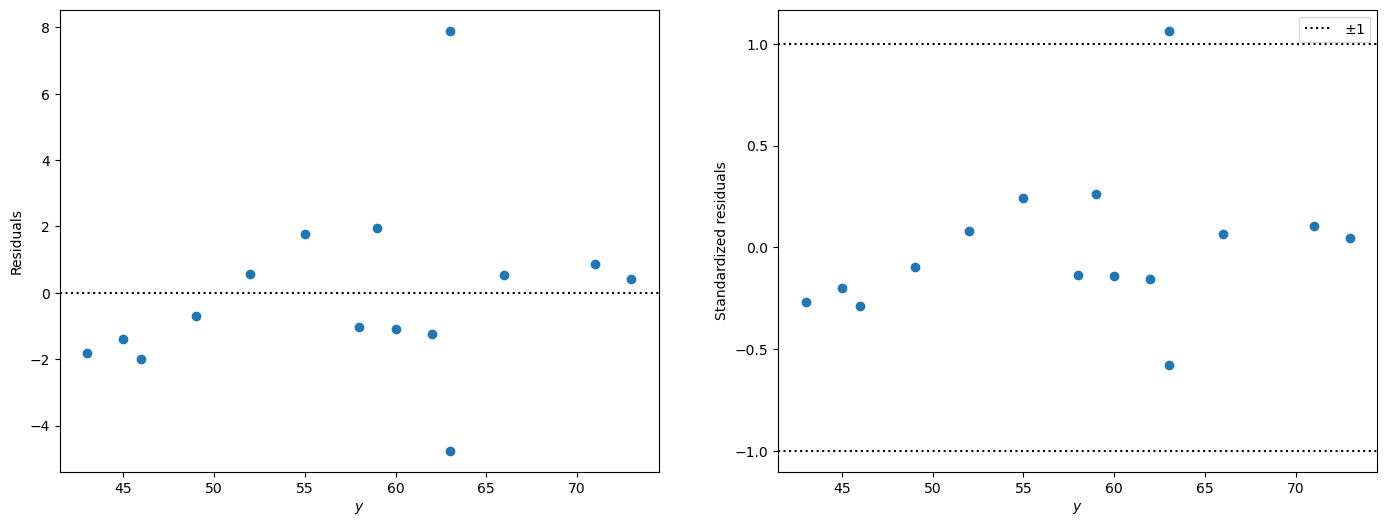

In [14]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].plot(reclamacoes.velocidade, modelo1.resid_response, 'o')
axes[0].axhline(y=0, linestyle=':', color='black', label='$\pm 1$')
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].plot(reclamacoes.velocidade, modelo1.resid_pearson, 'o')
axes[1].axhline(y=-1, linestyle=':', color='black', label='$\pm 1$')
axes[1].axhline(y=+1, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

In [15]:
modelo1.predict(reclamacoes.dia)

0     44.807363
1     46.378509
2     48.004746
3     49.688006
4     51.430289
5     53.233664
6     55.100273
7     57.032334
8     59.032141
9     61.102071
10    63.244582
11    65.462218
12    67.757615
13    70.133499
14    72.592692
dtype: float64

In [16]:
reclamacoes['previsao_veloc'] = modelo1.predict(reclamacoes.dia)

In [17]:
reclamacoes.head(14)

,dia,velocidade,conexao,instabilidade,previsao_veloc
0,1,43,15,34,44.807363
1,2,45,21,29,46.378509
2,3,46,17,26,48.004746
3,4,49,14,23,49.688006
4,5,52,20,25,51.430289
5,6,55,18,22,53.233664
6,7,63,17,19,55.100273
7,8,59,21,20,57.032334
8,9,58,23,14,59.032141
9,10,60,16,12,61.102071


In [18]:
modelo1.aic

94.09352707843601

## Avaliação da superdispersão (overdispersion) 

- H0: A variabilidade observada nos dados é consistente com a variabilidade esperada sob o modelo ajustado (não há superdispersão).
- H1: A variabilidade observada nos dados é maior do que seria esperado sob o modelo ajustado (há superdispersão).


Se o p-valor < 0.05, então rejeitamos a hipótese nula -> concluindo que há evidências de superdispersão nos dados.
Se o p-valor > 0.05 -> então não rejeitamos a hipótese nula -> indicando que a dispersão observada nos dados não é significativamente maior do que a esperada sob o modelo ajustado.

In [19]:
# Obtendo os Pearson Residuals
pearson_residuals = modelo1.resid_pearson

# Calculando o índice de Pearson
pearson_index = np.mean(pearson_residuals**2)

# Graus de liberdade do modelo
df_model = modelo1.df_model

# Valor-p associado ao teste de Pearson Chi-Squared
p_value_pearson = 1 - stats.chi2.cdf(pearson_index, df_model)
print("Índice de Pearson:", pearson_index)
print("Valor-p associado ao teste de Pearson Chi-Squared:", p_value_pearson)

Índice de Pearson: 0.12575964663538924
Valor-p associado ao teste de Pearson Chi-Squared: 0.7228697459471847


**O índice de Pearson** é uma medida que pode ajudar a determinar se os dados seguem uma distribuição de Poisson, uma distribuição de Binomial Negativa ou se requerem um modelo Quasi-Poisson devido à superdispersão. 

**Modelo de Poisson:**

- Um índice de Pearson próximo a 1. 
- Indica que a variância é aproximadamente igual à média, o que é consistente com a suposição do modelo de Poisson.
- Considerar intervalo 0.5 a 2. 


**Modelo de Binomial Negativa:**

- Se o índice de Pearson for significativamente maior do que 1
- índice de Pearson > 3 

**Modelo Quasi-Poisson:**

- O modelo Quasi-Poisson é uma escolha intermediária entre Poisson e Binomial Negativa 
- Índices de Pearson moderadamente maiores do que 1 

No entanto, é importante ressaltar que não há limites rígidos e rápidos para os valores de índice de Pearson que definem a escolha do modelo.

## **Modelo Reclamação por instabilidade**

In [20]:
modelo2 = smf.poisson("instabilidade ~ dia", data=reclamacoes).fit()

Optimization terminated successfully.
         Current function value: 2.408169
         Iterations 5


In [21]:
print(modelo2.summary())

                          Poisson Regression Results                          
Dep. Variable:          instabilidade   No. Observations:                   15
Model:                        Poisson   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                  0.3963
Time:                        14:25:27   Log-Likelihood:                -36.123
converged:                       True   LL-Null:                       -59.836
Covariance Type:            nonrobust   LLR p-value:                 5.709e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6116      0.109     32.986      0.000       3.397       3.826
dia           -0.0985      0.015     -6.706      0.000      -0.127      -0.070


**Equação: reclamação_insta = e^(3.6116-0.0985.dia)**

**Análise do modelo:**


*   Verificar a significancia dos coeficintes (Teste de Wald):
    * Estatisticamente significativo: p <= 0,05
    * Estatisticamente não é significativo: p > 0,05

*   Análise de Resíduos
    
*   Análise da Ausência de outliers e pontos de alavancagem

**Teste de Pearson:**

**Hipótese Nula (H0):** Não há relação entre os valores observados e os valores preditos pelo modelo.

**Hipótese Alternativa (H1):** Há uma relação entre os valores observados e os valores preditos pelo modelo.

Regra de Aceitação: Se o valor-p > 0.05, então não rejeitamos a hipótese nula.


In [22]:
# Obtendo os resíduos de Pearson
residuos_pearson2 = modelo2.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic2 = np.sum(residuos_pearson2**2)
pearson_df2 = len(residuos_pearson2) - modelo2.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value2 = 1 - stats.chi2.cdf(pearson_test_statistic2, pearson_df2)

print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic2)
print("Graus de liberdade:", pearson_df2)
print("Valor p:", pearson_p_value2)


Teste de Pearson para os Resíduos:
Estatística de teste: 2.3158316880182186
Graus de liberdade: 13.0
Valor p: 0.9994869657885335


#### Teste de Razão de Verossimilhança (Likelihood Ratio test)

Comparar a adequação de dois modelos, um modelo nulo e um modelo alternativo.


H0: O modelo mais simples (modelo nulo) é suficientemente bom para descrever os dados. Em outras palavras, não há diferença significativa entre o modelo nulo e o modelo alternativo em termos de ajuste aos dados.

H1 : O modelo mais complexo (modelo alternativo) fornece um ajuste significativamente melhor aos dados em comparação com o modelo nulo. Em outras palavras, há evidência estatística de que o modelo alternativo é preferível ao modelo nulo para explicar os dados.

**p-valor < 0.05** 
Indica que o modelo alternativo é estatisticamente melhor em ajustar os dados do que o modelo nulo

In [23]:
# Calcular o valor p para o teste de Razão de Verossimilhança (LR)
lrt_test_statistic2 = modelo2.llr  # Obtém o valor do teste de Likelihood Ratio
lrt_df2 = modelo2.df_model  # Obtém os graus de liberdade do modelo
lrt_p_value2 = 1 - stats.chi2.cdf(lrt_test_statistic2, lrt_df2)

print("\nTeste de Razão de Verossimilhança (LR) para os Resíduos:")
print(f"Estatística de teste: {lrt_test_statistic2}")
print(f"Graus de liberdade: {lrt_df2}")
print(f"Valor p: {lrt_p_value2}")


Teste de Razão de Verossimilhança (LR) para os Resíduos:
Estatística de teste: 47.42697712601752
Graus de liberdade: 1.0
Valor p: 5.7090998595299425e-12


**Análise de residuos**

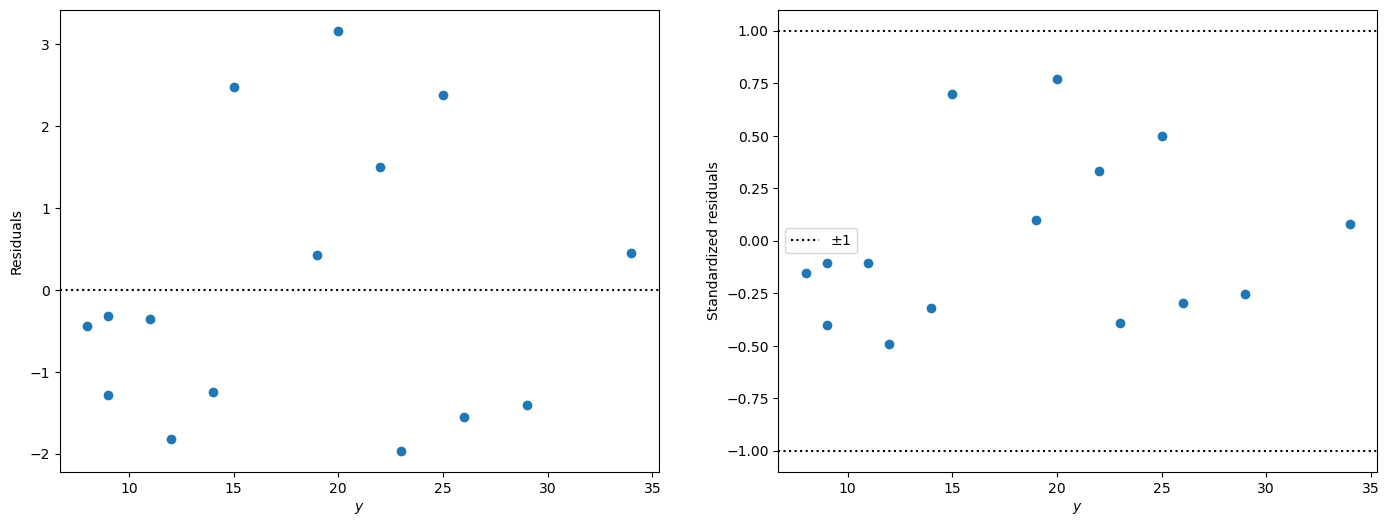

In [24]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].plot(reclamacoes.instabilidade, modelo2.resid_response, 'o')
axes[0].axhline(y=0, linestyle=':', color='black', label='$\pm 1$')
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].plot(reclamacoes.instabilidade, modelo2.resid_pearson, 'o')
axes[1].axhline(y=-1, linestyle=':', color='black', label='$\pm 1$')
axes[1].axhline(y=+1, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

In [25]:
modelo2.predict(reclamacoes.dia)

0     33.551308
1     30.403004
2     27.550122
3     24.964942
4     22.622344
5     20.499565
6     18.575977
7     16.832891
8     15.253368
9     13.822060
10    12.525060
11    11.349765
12    10.284754
13     9.319678
14     8.445162
dtype: float64

In [26]:
reclamacoes['previsao_insta'] = modelo2.predict(reclamacoes.dia)

In [27]:
reclamacoes.head(14)

,dia,velocidade,conexao,instabilidade,previsao_veloc,previsao_insta
0,1,43,15,34,44.807363,33.551308
1,2,45,21,29,46.378509,30.403004
2,3,46,17,26,48.004746,27.550122
3,4,49,14,23,49.688006,24.964942
4,5,52,20,25,51.430289,22.622344
5,6,55,18,22,53.233664,20.499565
6,7,63,17,19,55.100273,18.575977
7,8,59,21,20,57.032334,16.832891
8,9,58,23,14,59.032141,15.253368
9,10,60,16,12,61.102071,13.822060


In [28]:
modelo2.aic

76.24506367038431

## Avaliação da superdispersão (overdispersion) 

- H0: A variabilidade observada nos dados é consistente com a variabilidade esperada sob o modelo ajustado (não há superdispersão).
- H1: A variabilidade observada nos dados é maior do que seria esperado sob o modelo ajustado (há superdispersão).


Se o p-valor < 0.05, então rejeitamos a hipótese nula -> concluindo que há evidências de superdispersão nos dados.
Se o p-valor > 0.05 -> então não rejeitamos a hipótese nula -> indicando que a dispersão observada nos dados não é significativamente maior do que a esperada sob o modelo ajustado.


In [29]:
# Obtendo os Pearson Residuals
pearson_residuals2 = modelo2.resid_pearson

# Calculando o índice de Pearson
pearson_index2 = np.mean(pearson_residuals2**2)

# Graus de liberdade do modelo
df_model2 = modelo2.df_model

# Valor-p associado ao teste de Pearson Chi-Squared
p_value_pearson2 = 1 - stats.chi2.cdf(pearson_index2, df_model2)
print("Índice de Pearson:", pearson_index2)
print("Valor-p associado ao teste de Pearson Chi-Squared:", p_value_pearson2)


Índice de Pearson: 0.15438877920121458
Valor-p associado ao teste de Pearson Chi-Squared: 0.6943760759518869


**O índice de Pearson** é uma medida que pode ajudar a determinar se os dados seguem uma distribuição de Poisson, uma distribuição de Binomial Negativa ou se requerem um modelo Quasi-Poisson devido à superdispersão. 

**Modelo de Poisson:**

- Um índice de Pearson próximo a 1. 
- Indica que a variância é aproximadamente igual à média, o que é consistente com a suposição do modelo de Poisson.
- Considerar intercalo 0.5 a 2. 


**Modelo de Binomial Negativa:**

- Se o índice de Pearson for significativamente maior do que 1
- índice de Pearson > 3 

**Modelo Quasi-Poisson:**

- O modelo Quasi-Poisson é uma escolha intermediária entre Poisson e Binomial Negativa 
- Índices de Pearson moderadamente maiores do que 1 

No entanto, é importante ressaltar que não há limites rígidos e rápidos para os valores de índice de Pearson que definem a escolha do modelo.

## **Modelo Reclamação por Conexão**

In [30]:
modelo3 = smf.poisson("conexao ~ dia", data=reclamacoes).fit()

Optimization terminated successfully.
         Current function value: 2.548776
         Iterations 4


In [31]:
print(modelo3.summary())

                          Poisson Regression Results                          
Dep. Variable:                conexao   No. Observations:                   15
Model:                        Poisson   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                0.001732
Time:                        14:26:08   Log-Likelihood:                -38.232
converged:                       True   LL-Null:                       -38.298
Covariance Type:            nonrobust   LLR p-value:                    0.7157
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8604      0.129     22.250      0.000       2.608       3.112
dia            0.0051      0.014      0.364      0.716      -0.022       0.033


**Equação: reclamação_conexão = e^(2.8604+0.0051.dia)**

**Análise do modelo:**


*   Verificar a significancia dos coeficintes (Teste de Wald):
    * Estatisticamente significativo: p <= 0,05
    * Estatisticamente não é significativo: p > 0,05

*   Análise de Resíduos
    
*   Análise da Ausência de outliers e pontos de alavancagem

**Teste de Pearson:**

**Hipótese Nula (H0):** Não há relação entre os valores observados e os valores preditos pelo modelo.

**Hipótese Alternativa (H1):** Há uma relação entre os valores observados e os valores preditos pelo modelo.

Regra de Aceitação: Se o valor-p > 0.05, então não rejeitamos a hipótese nula.

In [32]:
# Obtendo os resíduos de Pearson
residuos_pearson3 = modelo3.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic3 = np.sum(residuos_pearson3**2)
pearson_df3 = len(residuos_pearson3) - modelo3.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value3 = 1 - stats.chi2.cdf(pearson_test_statistic3, pearson_df3)

print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic3)
print("Graus de liberdade:", pearson_df3)
print("Valor p:", pearson_p_value3)



Teste de Pearson para os Resíduos:
Estatística de teste: 5.397552212179668
Graus de liberdade: 13.0
Valor p: 0.9653678741002798


#### Teste de Razão de Verossimilhança (Likelihood Ratio test)

Comparar a adequação de dois modelos, um modelo nulo e um modelo alternativo.


H0: O modelo mais simples (modelo nulo) é suficientemente bom para descrever os dados. Em outras palavras, não há diferença significativa entre o modelo nulo e o modelo alternativo em termos de ajuste aos dados.

H1 : O modelo mais complexo (modelo alternativo) fornece um ajuste significativamente melhor aos dados em comparação com o modelo nulo. Em outras palavras, há evidência estatística de que o modelo alternativo é preferível ao modelo nulo para explicar os dados.

**p-valor < 0.05** 
Indica que o modelo alternativo é estatisticamente melhor em ajustar os dados do que o modelo nulo


In [33]:
# Calcular o valor p para o teste de Razão de Verossimilhança (LR)
lrt_test_statistic3 = modelo3.llr  # Obtém o valor do teste de Likelihood Ratio
lrt_df3 = modelo3.df_model  # Obtém os graus de liberdade do modelo
lrt_p_value3 = 1 - stats.chi2.cdf(lrt_test_statistic3, lrt_df3)

print("\nTeste de Razão de Verossimilhança (LR) para os Resíduos:")
print(f"Estatística de teste: {lrt_test_statistic3}")
print(f"Graus de liberdade: {lrt_df3}")
print(f"Valor p: {lrt_p_value3}")



Teste de Razão de Verossimilhança (LR) para os Resíduos:
Estatística de teste: 0.13265956517339816
Graus de liberdade: 1.0
Valor p: 0.7156902925483777


**Análise de residuos**

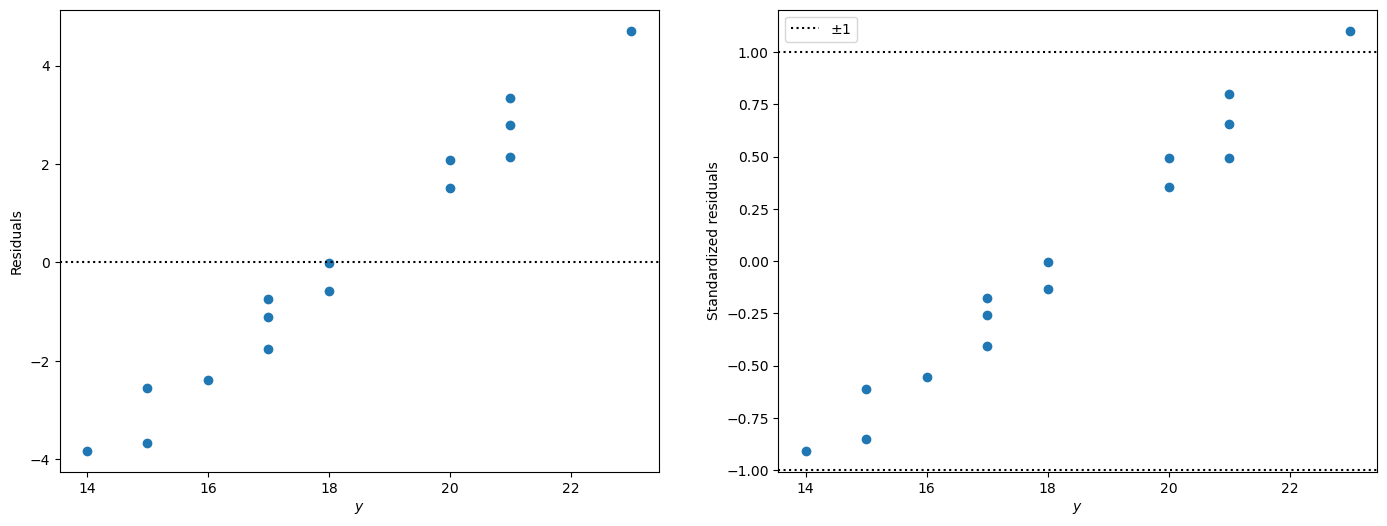

In [35]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].plot(reclamacoes.conexao, modelo3.resid_response, 'o')
axes[0].axhline(y=0, linestyle=':', color='black', label='$\pm 1$')
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].plot(reclamacoes.conexao, modelo3.resid_pearson, 'o')
axes[1].axhline(y=-1, linestyle=':', color='black', label='$\pm 1$')
axes[1].axhline(y=+1, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

## Avaliação da superdispersão (overdispersion) 

- H0: A variabilidade observada nos dados é consistente com a variabilidade esperada sob o modelo ajustado (não há superdispersão).
- H1: A variabilidade observada nos dados é maior do que seria esperado sob o modelo ajustado (há superdispersão).


Se o p-valor < 0.05, então rejeitamos a hipótese nula -> concluindo que há evidências de superdispersão nos dados.
Se o p-valor > 0.05 -> então não rejeitamos a hipótese nula -> indicando que a dispersão observada nos dados não é significativamente maior do que a esperada sob o modelo ajustado.


In [34]:
# Obtendo os Pearson Residuals
pearson_residuals3 = modelo3.resid_pearson

# Calculando o índice de Pearson
pearson_index3 = np.mean(pearson_residuals3**2)

# Graus de liberdade do modelo
df_model3 = modelo3.df_model

# Valor-p associado ao teste de Pearson Chi-Squared
p_value_pearson3 = 1 - stats.chi2.cdf(pearson_index3, df_model3)
print("Índice de Pearson:", pearson_index3)
print("Valor-p associado ao teste de Pearson Chi-Squared:", p_value_pearson3)


Índice de Pearson: 0.35983681414531116
Valor-p associado ao teste de Pearson Chi-Squared: 0.5485968787069541


**O índice de Pearson** é uma medida que pode ajudar a determinar se os dados seguem uma distribuição de Poisson, uma distribuição de Binomial Negativa ou se requerem um modelo Quasi-Poisson devido à superdispersão. 

**Modelo de Poisson:**

- Um índice de Pearson próximo a 1. 
- Indica que a variância é aproximadamente igual à média, o que é consistente com a suposição do modelo de Poisson.
- Considerar intercalo 0.5 a 2. 


**Modelo de Binomial Negativa:**

- Se o índice de Pearson for significativamente maior do que 1
- índice de Pearson > 3 


In [36]:
modelo3.predict(reclamacoes.dia)

0     17.557142
1     17.646957
2     17.737231
3     17.827968
4     17.919168
5     18.010835
6     18.102971
7     18.195578
8     18.288659
9     18.382216
10    18.476252
11    18.570769
12    18.665769
13    18.761255
14    18.857230
dtype: float64

In [37]:
reclamacoes['previsao_conexao'] = modelo3.predict(reclamacoes.dia)

In [38]:
reclamacoes.head(14)

,dia,velocidade,conexao,instabilidade,previsao_veloc,previsao_insta,previsao_conexao
0,1,43,15,34,44.807363,33.551308,17.557142
1,2,45,21,29,46.378509,30.403004,17.646957
2,3,46,17,26,48.004746,27.550122,17.737231
3,4,49,14,23,49.688006,24.964942,17.827968
4,5,52,20,25,51.430289,22.622344,17.919168
5,6,55,18,22,53.233664,20.499565,18.010835
6,7,63,17,19,55.100273,18.575977,18.102971
7,8,59,21,20,57.032334,16.832891,18.195578
8,9,58,23,14,59.032141,15.253368,18.288659
9,10,60,16,12,61.102071,13.822060,18.382216


In [39]:
modelo3.aic

80.46327008100528

## **Modelo Reclamação por Velocidade com duas variáveis independentes**

In [40]:
modelo4 = smf.poisson("velocidade ~ dia + instabilidade", data=reclamacoes).fit()

Optimization terminated successfully.
         Current function value: 3.003105
         Iterations 5


In [41]:
print(modelo4.summary())

                          Poisson Regression Results                          
Dep. Variable:             velocidade   No. Observations:                   15
Model:                        Poisson   Df Residuals:                       12
Method:                           MLE   Df Model:                            2
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                  0.1745
Time:                        14:26:56   Log-Likelihood:                -45.047
converged:                       True   LL-Null:                       -54.572
Covariance Type:            nonrobust   LLR p-value:                 7.298e-05
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.7560      0.627      5.989      0.000       2.527       4.985
dia               0.0351      0.034      1.024      0.306      -0.032       0.102
instabilidade     0.0004      0.019     

**Equação: reclamação_veloc = e^(3.7560+0.0351.dia+0.0004.instabilidade)**

**Análise do modelo:**


*   Verificar a significancia dos coeficintes (Teste de Wald):
    * Estatisticamente significativo: p <= 0,05
    * Estatisticamente não é significativo: p > 0,05

*   Análise de Resíduos
    
*   Análise da Ausência de outliers e pontos de alavancagem


**Teste de Pearson:**

**Hipótese Nula (H0):** Não há relação entre os valores observados e os valores preditos pelo modelo.

**Hipótese Alternativa (H1):** Há uma relação entre os valores observados e os valores preditos pelo modelo.

Regra de Aceitação: Se o valor-p > 0.05, então não rejeitamos a hipótese nula.


In [42]:
# Obtendo os resíduos de Pearson
residuos_pearson4 = modelo4.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic4 = np.sum(residuos_pearson4**2)
pearson_df4 = len(residuos_pearson4) - modelo4.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value4 = 1 - stats.chi2.cdf(pearson_test_statistic4, pearson_df4)

print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)


Teste de Pearson para os Resíduos:
Estatística de teste: 1.8863946995308387
Graus de liberdade: 13.0
Valor p: 0.9998376195420132


#### Teste de Razão de Verossimilhança (Likelihood Ratio test)

Comparar a adequação de dois modelos, um modelo nulo e um modelo alternativo.


H0: O modelo mais simples (modelo nulo) é suficientemente bom para descrever os dados. Em outras palavras, não há diferença significativa entre o modelo nulo e o modelo alternativo em termos de ajuste aos dados.

H1 : O modelo mais complexo (modelo alternativo) fornece um ajuste significativamente melhor aos dados em comparação com o modelo nulo. Em outras palavras, há evidência estatística de que o modelo alternativo é preferível ao modelo nulo para explicar os dados.

**p-valor < 0.05** 
Indica que o modelo alternativo é estatisticamente melhor em ajustar os dados do que o modelo nulo

In [43]:
# Calcular o valor p para o teste de Razão de Verossimilhança (LR)
lrt_test_statistic4 = modelo4.llr  # Obtém o valor do teste de Likelihood Ratio
lrt_df4 = modelo4.df_model  # Obtém os graus de liberdade do modelo
lrt_p_value4 = 1 - stats.chi2.cdf(lrt_test_statistic4, lrt_df4)

print("\nTeste de Razão de Verossimilhança (LR) para os Resíduos:")
print(f"Estatística de teste: {lrt_test_statistic4}")
print(f"Graus de liberdade: {lrt_df4}")
print(f"Valor p: {lrt_p_value4}")


Teste de Razão de Verossimilhança (LR) para os Resíduos:
Estatística de teste: 19.050713883151616
Graus de liberdade: 2.0
Valor p: 7.297767820602097e-05


**Análise de residuos**

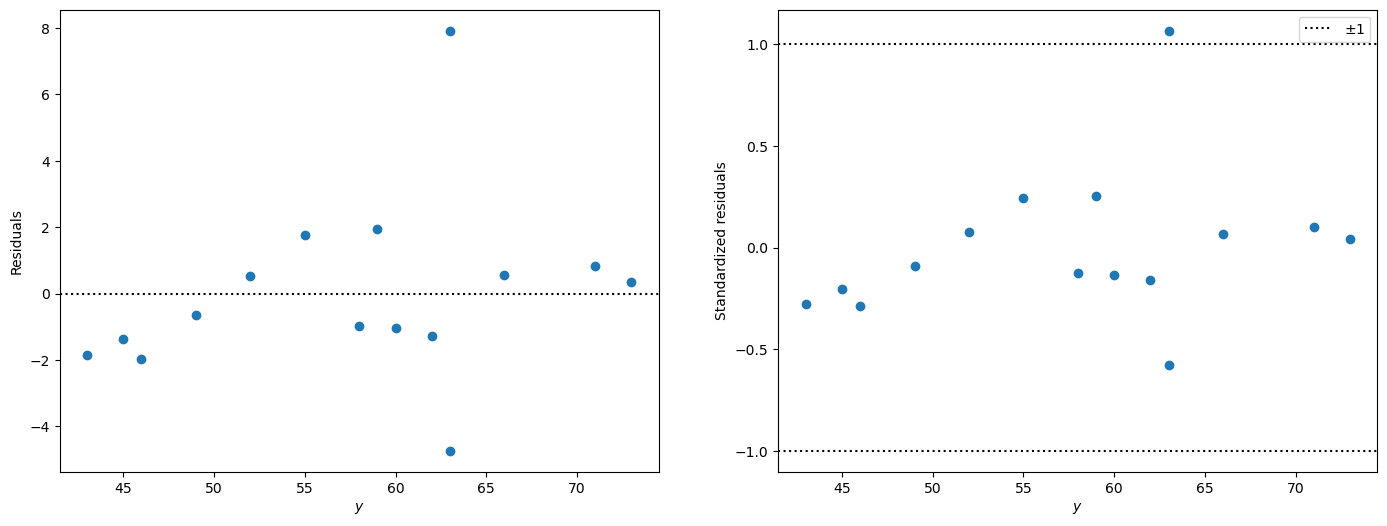

In [44]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].plot(reclamacoes.velocidade, modelo4.resid_response, 'o')
axes[0].axhline(y=0, linestyle=':', color='black', label='$\pm 1$')
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].plot(reclamacoes.velocidade, modelo4.resid_pearson, 'o')
axes[1].axhline(y=-1, linestyle=':', color='black', label='$\pm 1$')
axes[1].axhline(y=+1, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

## Avaliação da superdispersão (overdispersion) 

- H0: A variabilidade observada nos dados é consistente com a variabilidade esperada sob o modelo ajustado (não há superdispersão).
- H1: A variabilidade observada nos dados é maior do que seria esperado sob o modelo ajustado (há superdispersão).


Se o p-valor < 0.05, então rejeitamos a hipótese nula -> concluindo que há evidências de superdispersão nos dados.
Se o p-valor > 0.05 -> então não rejeitamos a hipótese nula -> indicando que a dispersão observada nos dados não é significativamente maior do que a esperada sob o modelo ajustado.


In [45]:
# Obtendo os Pearson Residuals
pearson_residuals4 = modelo4.resid_pearson

# Calculando o índice de Pearson
pearson_index4 = np.mean(pearson_residuals4**2)

# Graus de liberdade do modelo
df_model4 = modelo4.df_model

# Valor-p associado ao teste de Pearson Chi-Squared
p_value_pearson4 = 1 - stats.chi2.cdf(pearson_index4, df_model4)
print("Índice de Pearson:", pearson_index4)
print("Valor-p associado ao teste de Pearson Chi-Squared:", p_value_pearson4)



Índice de Pearson: 0.12576664017365677
Valor-p associado ao teste de Pearson Chi-Squared: 0.939053035923848


**O índice de Pearson** é uma medida que pode ajudar a determinar se os dados seguem uma distribuição de Poisson, uma distribuição de Binomial Negativa ou se requerem um modelo Quasi-Poisson devido à superdispersão. 

**Modelo de Poisson:**

- Um índice de Pearson próximo a 1. 
- Indica que a variância é aproximadamente igual à média, o que é consistente com a suposição do modelo de Poisson.
- Considerar intercalo 0.5 a 2. 


**Modelo de Binomial Negativa:**

- Se o índice de Pearson for significativamente maior do que 1
- índice de Pearson > 3 

**Modelo Quasi-Poisson:**

- O modelo Quasi-Poisson é uma escolha intermediária entre Poisson e Binomial Negativa 
- Índices de Pearson moderadamente maiores do que 1 

No entanto, é importante ressaltar que não há limites rígidos e rápidos para os valores de índice de Pearson que definem a escolha do modelo.

In [46]:
modelo4.predict()

array([44.86608238, 46.3831428 , 47.98691457, 49.64613932, 51.4576226 ,
       53.23685267, 55.07760248, 57.06619903, 58.97400919, 61.03565706,
       63.28607712, 65.4501302 , 67.73817409, 70.1579821 , 72.63741438])

In [47]:
reclamacoes['previsao_veloc2'] = modelo4.predict()

In [48]:
reclamacoes.head(14)

,dia,velocidade,conexao,instabilidade,previsao_veloc,previsao_insta,previsao_conexao,previsao_veloc2
0,1,43,15,34,44.807363,33.551308,17.557142,44.866082
1,2,45,21,29,46.378509,30.403004,17.646957,46.383143
2,3,46,17,26,48.004746,27.550122,17.737231,47.986915
3,4,49,14,23,49.688006,24.964942,17.827968,49.646139
4,5,52,20,25,51.430289,22.622344,17.919168,51.457623
5,6,55,18,22,53.233664,20.499565,18.010835,53.236853
6,7,63,17,19,55.100273,18.575977,18.102971,55.077602
7,8,59,21,20,57.032334,16.832891,18.195578,57.066199
8,9,58,23,14,59.032141,15.253368,18.288659,58.974009
9,10,60,16,12,61.102071,13.822060,18.382216,61.035657


In [49]:
modelo4.aic

96.09316303655223

In [50]:
modelo1.aic

94.09352707843601